## Fraud Detection

Kaggle dataset: https://www.kaggle.com/c/ieee-fraud-detection/data

In [1]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt

Load train and test data

In [2]:
test_id = pd.read_csv('test_identity.csv', low_memory=False)
train_id =  pd.read_csv('train_identity.csv', low_memory=False)

test_trans = pd.read_csv('test_transaction.csv', low_memory=False)
train_trans =  pd.read_csv('train_transaction.csv', low_memory=False)


In [3]:
print('train identity count',len(train_id))
print('train transaction count',len(train_trans))
print('__________________________________')
print('test identity count', len(test_id))
print('test transaction count',len(test_trans))


train identity count 144233
train transaction count 590540
__________________________________
test identity count 141907
test transaction count 506691


In [4]:
print(train_trans.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN  

In [5]:
print(train_id.head())

   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                  

In [6]:
print(train_trans.isnull().sum())

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
                   ...  
V310                  12
V311                  12
V312                  12
V313                1269
V314                1269
V315                1269
V316                  12
V317                  12
V318                  12


There are too many null in the df. Keeping the first 10 features only.

In [7]:
train_trans_new=train_trans.iloc[:,0:10]

In [8]:
print(train_trans_new.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  
0    NaN  150.0    discover  142.0  
1  404.0  150.0  mastercard  102.0  
2  490.0  150.0        visa  166.0  
3  567.0  150.0  mastercard  117.0  
4  514.0  150.0  mastercard  102.0  


In [9]:
print(train_id.isnull().sum())

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64


Keeping first 2 features from the ID file.

In [10]:
train_id_new=train_id[['TransactionID','id_01']]

In [11]:
print(train_id_new.head())

   TransactionID  id_01
0        2987004    0.0
1        2987008   -5.0
2        2987010   -5.0
3        2987011   -5.0
4        2987016    0.0


Now we can join the 2 train datasets

In [12]:
train = pd.merge(train_trans_new,train_id_new,on='TransactionID')

In [13]:
print(train.shape)
print(train.head())

(144233, 11)
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987004        0          86506          50.000         H   4497   
1        2987008        0          86535          15.000         H   2803   
2        2987010        0          86549          75.887         C  16496   
3        2987011        0          86555          16.495         C   4461   
4        2987016        0          86620          30.000         H   1790   

   card2  card3       card4  card5  id_01  
0  514.0  150.0  mastercard  102.0    0.0  
1  100.0  150.0        visa  226.0   -5.0  
2  352.0  117.0  mastercard  134.0   -5.0  
3  375.0  185.0  mastercard  224.0   -5.0  
4  555.0  150.0        visa  226.0    0.0  


Visualize the data- Scatter plot

In [14]:
frauds = train.loc[train['isFraud'] == 1]
non_frauds = train.loc[train['isFraud'] == 0]

<Figure size 1152x648 with 0 Axes>

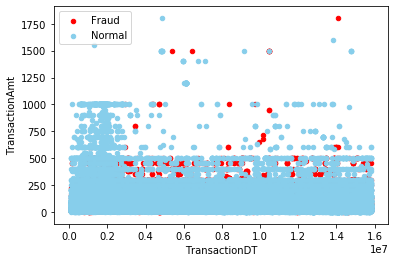

In [15]:
plt.figure(figsize=(16,9))
ax = frauds.plot.scatter(x='TransactionDT',y='TransactionAmt',color='red',label='Fraud')
non_frauds.plot.scatter(x='TransactionDT',y='TransactionAmt',color='skyblue',label='Normal',ax=ax)
plt.legend(loc='best')
plt.show()

Visualize the data- bar chart
Relationship between frauds and credit card provider

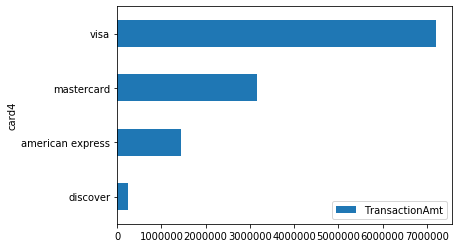

In [16]:
bar_chart= train[["TransactionAmt","card4"]]
bar_chart.groupby("card4").sum().sort_values("TransactionAmt").plot(kind="barh")

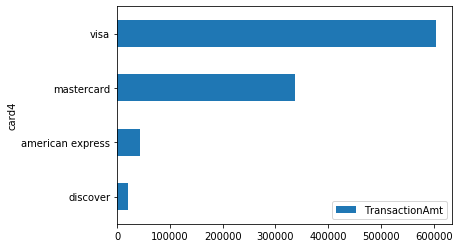

In [17]:
bar_chart_frauds= frauds[["TransactionAmt","card4"]]
bar_chart_frauds.groupby("card4").sum().sort_values("TransactionAmt").plot(kind="barh")

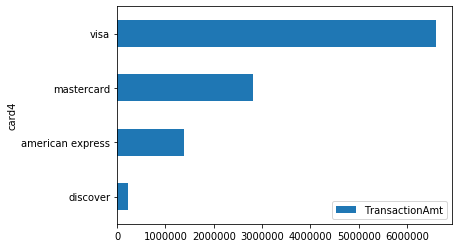

In [18]:
bar_chart_non_frauds= non_frauds[["TransactionAmt","card4"]]
bar_chart_non_frauds.groupby("card4").sum().sort_values("TransactionAmt").plot(kind="barh")

In [19]:
print(train.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987004        0          86506          50.000         H   4497   
1        2987008        0          86535          15.000         H   2803   
2        2987010        0          86549          75.887         C  16496   
3        2987011        0          86555          16.495         C   4461   
4        2987016        0          86620          30.000         H   1790   

   card2  card3       card4  card5  id_01  
0  514.0  150.0  mastercard  102.0    0.0  
1  100.0  150.0        visa  226.0   -5.0  
2  352.0  117.0  mastercard  134.0   -5.0  
3  375.0  185.0  mastercard  224.0   -5.0  
4  555.0  150.0        visa  226.0    0.0  


'ProductCD' and 'card4' columns are categorical. We will create dummy variables for cateogorical features using Pandas get_dummies.

In [20]:
ProductCD_dummy = pd.get_dummies(train['ProductCD'],prefix='ProductCD')
card4_dummy = pd.get_dummies(train['card4'],prefix='card4')

Dropping the first variable in each features to prevent perfect multi-collinearity

In [21]:
print(ProductCD_dummy.head())
print(card4_dummy.head())

   ProductCD_C  ProductCD_H  ProductCD_R  ProductCD_S
0            0            1            0            0
1            0            1            0            0
2            1            0            0            0
3            1            0            0            0
4            0            1            0            0
   card4_american express  card4_discover  card4_mastercard  card4_visa
0                       0               0                 1           0
1                       0               0                 0           1
2                       0               0                 1           0
3                       0               0                 1           0
4                       0               0                 0           1


Dropping the first variable in each features to prevent perfect multi-collinearity ('ProductCD_C', 'card4_american express')

In [22]:
ProductCD_dummy = ProductCD_dummy.drop('ProductCD_C',axis=1)
card4_dummy = card4_dummy.drop('card4_american express',axis=1)

Drop 'ProductCD' and 'card4' replace features with the dummies above

In [23]:
train=train.drop(['ProductCD','card4'],axis=1)

Join new create features to train data frame

In [24]:
train=train.join(ProductCD_dummy)
train=train.join(card4_dummy)

Remove 'TransactionID'

In [25]:
train=train.drop('TransactionID',axis=1)

remove NAN records

In [26]:
train_new = train.dropna()

In [27]:
print(train_new.head())

   isFraud  TransactionDT  TransactionAmt  card1  card2  card3  card5  id_01  \
0        0          86506          50.000   4497  514.0  150.0  102.0    0.0   
1        0          86535          15.000   2803  100.0  150.0  226.0   -5.0   
2        0          86549          75.887  16496  352.0  117.0  134.0   -5.0   
3        0          86555          16.495   4461  375.0  185.0  224.0   -5.0   
4        0          86620          30.000   1790  555.0  150.0  226.0    0.0   

   ProductCD_H  ProductCD_R  ProductCD_S  card4_discover  card4_mastercard  \
0            1            0            0               0                 1   
1            1            0            0               0                 0   
2            0            0            0               0                 1   
3            0            0            0               0                 1   
4            1            0            0               0                 0   

   card4_visa  
0           0  
1           1  
2 

Create x-train and y_train

In [28]:
x= train_new.drop('isFraud',axis=1)
y= train_new['isFraud']

Prep train/test dataset

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Creat Logistics Regression with sklearn

In [30]:
from sklearn import linear_model

In [31]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(x_train,y_train)

C:\Users\Yan family\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Print score

In [32]:
print('Score',logistic.score(x_test,y_test))

Score 0.9229259631334252
